In [77]:
import numpy as np
import pandas as pd
from pathlib import Path

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

In [79]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

In [80]:
## Load measurement data
maindir = Path.cwd() / "tutorial_data/"
data = maindir / "Sphere_data_short.csv"
df = pd.read_csv(data, sep=',', header=0)
df

,Rnom,Xnom,Ynom,Znom,R,X,Y,Z,Nx,Ny,...,oriY,oriZ,Inc,ang,ViewAng,Acmos,AcmosJ,oriYcmos,Rs,PointDev
0,8.00130,-5.186012,-3.672416,4.862041,7.947929,-5.151420,-3.647920,4.82961,-0.639832,-0.448649,...,-0.449879,-0.376037,0.623358,5.385419,0.356821,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.949714,85.137959,-0.053371
1,8.00130,1.865099,-1.576667,7.619470,8.002077,1.865280,-1.576820,7.62021,0.234097,-0.202082,...,-0.203311,-0.049020,0.950749,0.315153,0.759709,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.703146,82.380530,0.000777
2,8.00130,-1.993943,-1.865494,7.520966,7.979538,-1.988520,-1.860420,7.50051,-0.244240,-0.206107,...,-0.207336,-0.052441,0.947284,5.957040,0.754812,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.707171,82.479034,-0.021762
3,8.00130,0.482676,3.214214,7.311406,7.966614,0.480584,3.200280,7.27971,0.092929,0.421877,...,0.420648,-0.098121,0.902404,0.445481,0.995318,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.079187,82.688594,-0.034686
4,8.00130,5.470189,2.896799,5.070146,7.975835,5.452780,2.887580,5.05401,0.682910,0.355493,...,0.354263,-0.361830,0.638661,0.878040,0.729854,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.145572,84.929854,-0.025465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,15.00425,10.166875,8.333547,7.232853,14.960161,10.137000,8.309060,7.21160,0.679505,0.555302,...,0.554073,-0.520507,0.480230,1.069880,0.677499,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,0.054238,82.767147,-0.044089
4046,15.00425,1.907981,-0.768472,14.862590,14.945102,1.900460,-0.765443,14.80400,0.153036,-0.065725,...,-0.066955,-0.013966,0.985963,0.167747,0.852126,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.566790,75.137410,-0.059148
4047,15.00425,3.328417,10.136954,10.549471,14.989073,3.325050,10.126700,10.53880,0.225904,0.674502,...,0.673273,-0.297137,0.703709,5.492993,0.930567,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,0.173438,79.450529,-0.015177
4048,15.00425,6.578290,-6.326970,11.908949,14.973824,6.564950,-6.314140,11.88480,0.445781,-0.414212,...,-0.415441,-0.206457,0.793068,0.654967,0.523939,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-0.915276,78.091051,-0.030426


In [82]:
## randomization settings
seed_num = 21
np.random.seed(seed_num)

In [83]:
print(df.columns.to_numpy())

['Rnom' 'Xnom' 'Ynom' 'Znom' 'R' 'X' 'Y' 'Z' 'Nx' 'Ny' 'Nz' 'I' 'J' 'K'
 'LateralDensity' 'DirectionDensity' 'ExposureTime' 'oriX' 'oriY' 'oriZ'
 'Inc' 'ang' 'ViewAng' 'Acmos' 'AcmosJ' 'oriYcmos' 'Rs' 'PointDev']


In [84]:
## select input features, target variable fro dataframe columns
feature_names = ['Nx', 'Ny', 'Nz', 'Xnom', 'Ynom', 'Znom',
                 'LateralDensity', 'DirectionDensity', 'ExposureTime',
                 'oriX', 'oriY', 'oriZ', 'Inc', 'ang', 'ViewAng', 'Rs',
                 'AcmosJ', 'oriYcmos']
target_variable = 'PointDev'

In [85]:
## Scale features & target to [0, 1] interval
Xall = df[feature_names].values
Yall = df[target_variable].values.reshape(-1, 1)
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
scalerX.fit(Xall)
scalerY.fit(Yall)

Xsc = scalerX.transform(Xall)
Ysc = scalerY.transform(Yall)

In [86]:
## Split data into train & test partitions
X_train, X_test, y_train, y_test = train_test_split(Xsc, Ysc, test_size=0.33, random_state=seed_num)

In [87]:
## instantiate regressors
# svm = SVR()

# dtree = DecisionTreeRegressor()

mlp = MLPRegressor(hidden_layer_sizes=[1024, 512, 64])

# rfrst = RandomForestRegressor()

# gbr = GradientBoostingRegressor()

In [88]:
## Select performance scores
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

In [89]:
## Select hyper-parameters & build model
# hparams = {'tol': 0.001, 'max_iter': 20000, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.01, 
#           'degree': 2, 'coef0': 0.0, 'C': 10.0}

model = mlp

In [90]:
## Train model on the train partition, predict on the test partition
trained_model = model.fit(X_train, y_train.ravel())
predictions = trained_model.predict(X_test)

In [91]:
## Compute performance scores on the unseen test partition
mae = metrics.mean_absolute_error(y_test.ravel(), predictions)
mape = metrics.mean_absolute_percentage_error(y_test.ravel(), predictions)

In [92]:
print("We achieved a MAE: %.3f on a test set with standard deviation: %.3f" % (mae, float(np.std(y_test))))

We achieved a MAE: 0.057 on a test set with standard deviation: 0.103


In [94]:
## Load Complete Point Cloud to perform inference
filename = "Processed_Sphere_16.0026_75_2_0.6.csv"
filepath = maindir / filename
sdf = pd.read_csv(filepath, sep=',', header=0)

In [95]:
## Perform inference
x = sdf[feature_names].values
xsc = scalerX.transform(x)
y = sdf[target_variable].values.reshape(-1, 1)
ys = scalerY.transform(y)
predictions = trained_model.predict(xsc).reshape(-1, 1)
predictions = scalerY.inverse_transform(predictions)
sdf['predictions'] = predictions

In [96]:
sdf

,Rnom,Xnom,Ynom,Znom,R,X,Y,Z,Nx,Ny,...,oriZ,Inc,ang,ViewAng,Acmos,AcmosJ,oriYcmos,Rs,PointDev,predictions
0,8.0013,-4.859156,-4.425853,4.563029,7.984609,-4.84902,-4.41662,4.55351,-0.605236,-0.529881,...,-0.405932,0.593366,5.347623,0.293706,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-1.030945,85.436971,-0.016691,-0.039337
1,8.0013,-4.781778,-4.489550,4.582503,7.978613,-4.76822,-4.47682,4.56951,-0.597890,-0.540680,...,-0.408228,0.591057,0.938428,0.286816,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-1.041744,85.417497,-0.022687,-0.033423
2,8.0013,-4.892546,-4.419072,4.533828,7.996679,-4.88972,-4.41652,4.53121,-0.607012,-0.528706,...,-0.406697,0.592602,5.346674,0.293548,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-1.029770,85.466172,-0.004621,-0.039701
3,8.0013,-4.692193,-4.425089,4.735263,7.986511,-4.68352,-4.41691,4.72651,-0.575453,-0.549028,...,-0.393846,0.605431,5.362696,0.295937,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-1.050092,85.264737,-0.014789,-0.038101
4,8.0013,-4.704784,-4.552451,4.600108,7.973300,-4.68832,-4.53652,4.58401,-0.591768,-0.544668,...,-0.405737,0.593544,5.347844,0.287257,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,-1.045733,85.399892,-0.028000,-0.037989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65760,8.0013,5.107913,5.711209,2.304804,7.982921,5.09618,5.69809,2.29951,0.635009,0.704832,...,-0.683810,0.317107,1.248119,0.598481,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,0.203767,87.695196,-0.018379,-0.040574
65761,8.0013,4.839035,5.432211,3.331009,7.955903,4.81158,5.40139,3.31211,0.593310,0.676646,...,-0.563956,0.436923,5.164564,0.693006,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,0.175581,86.668991,-0.045397,-0.030454
65762,8.0013,4.835606,5.374350,3.428422,7.954596,4.80738,5.34298,3.40841,0.586853,0.679995,...,-0.560443,0.440440,1.114708,0.697647,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,0.178931,86.571578,-0.046704,-0.039791
65763,8.0013,4.911143,5.365373,3.333804,7.967473,4.89038,5.34269,3.31971,0.599537,0.674256,...,-0.568799,0.432077,5.159184,0.687606,[8.1483500e-05 5.0106436e-01 9.9999900e-01],0.501064,0.173192,86.666196,-0.033827,-0.029806


In [97]:
def create_color_mask(row, col='PointDev'):
    pointdev = row[col]
    if (pointdev > 0.05):
        color = 5
    elif (pointdev >= 0.04) & (pointdev < 0.05):
        color = 4
    elif (pointdev >= 0.03) & (pointdev < 0.04):
        color = 3
    elif (pointdev >= 0.02) & (pointdev < 0.03):
        color = 2
    elif (pointdev >= 0.01) & (pointdev < 0.02):
        color = 1
    elif (pointdev > -0.01) & (pointdev < 0.01):
        color = 0
    elif (pointdev <= -0.01) & (pointdev > -0.02):
        color = -1
    elif (pointdev <= -0.02) & (pointdev > -0.03):
        color = -2
    elif (pointdev <= -0.03) & (pointdev > -0.04):
        color = -3
    elif (pointdev <= -0.04) & (pointdev > -0.05):
        color = -4
    elif (pointdev <= -0.05):
        color = -5
        
    return color

In [98]:
## Map values to colormap, for visualization purposes
sdf['color_actual'] = sdf.apply(lambda x: create_color_mask(x, col='PointDev'), axis=1)
sdf['color_predicted'] = sdf.apply(lambda x: create_color_mask(x, col='predictions'), axis=1)
cmap = cm.coolwarm

In [99]:
## Retrieve geometry, diameter & scanning parameters from filename
sparams = filename[:-4].split('_')
geometry = sparams[1]
diameter = float(sparams[2])
lateral_density = int(sparams[3])
direction_density = int(sparams[4])
exposure_time = float(sparams[5])
print('Geometry: ', geometry)
print('Diameter: ', diameter, ' mm')
print('Lateral Density: ', lateral_density)
print('Direction Density: ', direction_density)
print('Exposure Time: ', exposure_time)

Geometry:  Sphere
Diameter:  16.0026  mm
Lateral Density:  75
Direction Density:  2
Exposure Time:  0.6


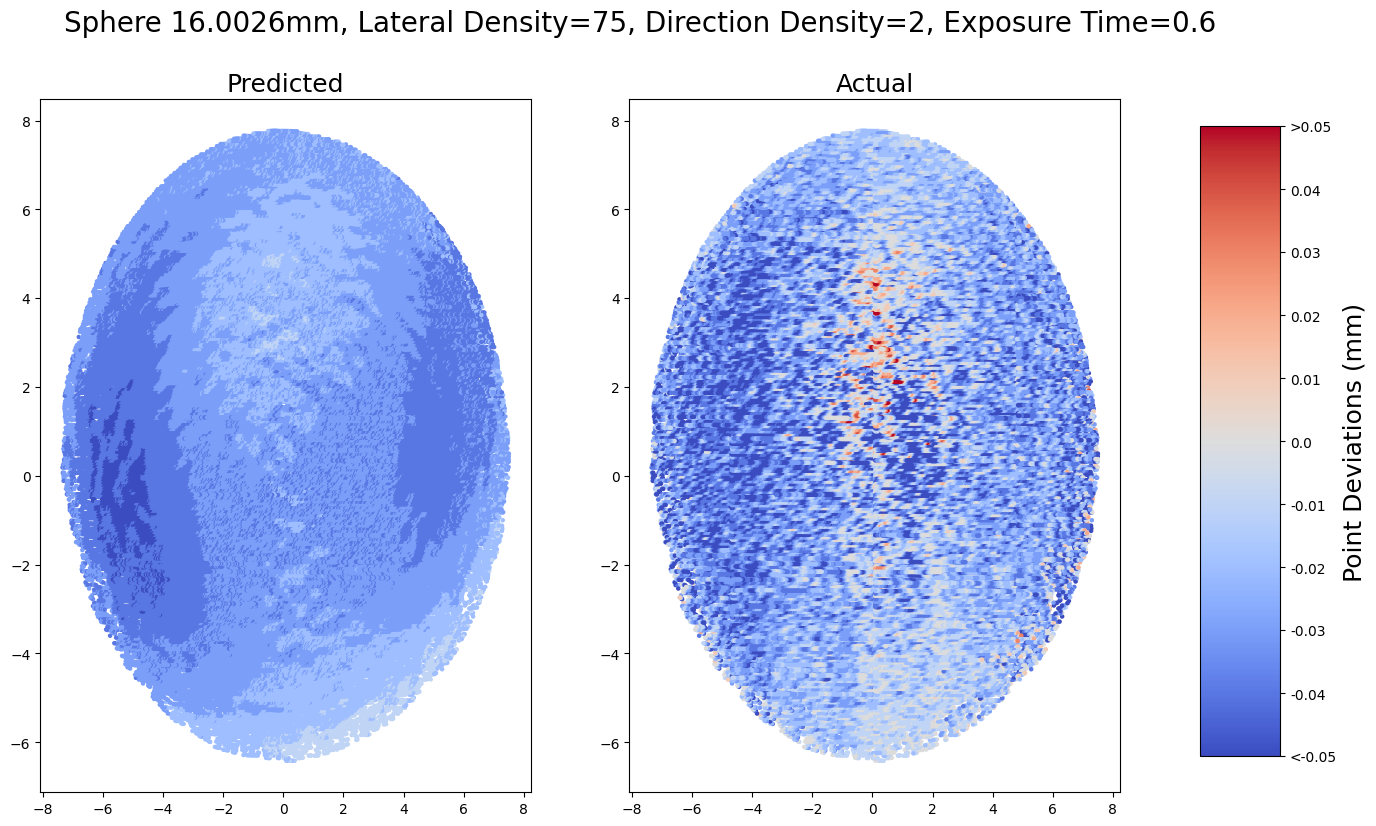

In [100]:
## Create Predicted Point Deviation (error) map and compare to actual values
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))
pc = ax1.scatter(sdf.Xnom.values, sdf.Ynom.values, c=sdf.color_predicted.values, norm=colors.CenteredNorm(), s=5, cmap=cmap)
# fig.colorbar(pc, ax=ax1)
ax1.set_title('Predicted', fontsize=18)

pc = ax2.scatter(sdf.Xnom.values, sdf.Ynom.values, c=sdf.color_actual.values, s=5, norm=colors.CenteredNorm(), cmap=cmap)
# fig.colorbar(pc, ax=ax2)
ax2.set_title('Actual', fontsize=18)
title = '{} {}mm, Lateral Density={}, Direction Density={}, Exposure Time={}'.format(
    geometry, diameter, lateral_density, direction_density, exposure_time)
fig.suptitle(title, fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(pc, cbar_ax, ticks=np.arange(-5, 6, 1))
cbar.ax.set_yticklabels(['<-0.05', '-0.04', '-0.03', '-0.02', '-0.01', '0.0', '0.01', '0.02', '0.03', '0.04', '>0.05'])
cbar.set_label('Point Deviations (mm)', fontsize=18)
nm = '_'.join(['PointDevMap', filename[:-4]])
#     nm = '_'.join(['PointDevMap', name[:-4], 'FaceOn'])
nm += '.png'
savefile = maindir / nm
plt.savefig(savefile, bbox_inches='tight', pad_inches=0.1, format='png')
# plt.close('all')
plt.show()

# Explainability Part

We will implement two Feature Effect Methods:

- Partial Dependence Plot
- Accumulated Local Effects (ALE)

In [101]:
import copy
from sklearn.inspection import PartialDependenceDisplay
import PyALE

## Partial Dependence Plot

PDP(x_s) = (1\N) sum_(i=1)^N f(x_s, x_c^i)

where
* x_s is the feature of interest
* x_c^i are the rest of the features for the i-th sample

In [102]:
def pdp_on_single_point(model, training_set, feature, xs):
    """
    Partial Dependence Plot on a single point xs

    :param model: scikit model
    :param training_set: ndarray of shape (N, D)
    :param feature: int, index of the feature to be explained
    :param xs: float, point to be explained
    :return: ndarray of shape (N, D), partial dependence plot at x_s
    """
    # step 1: deepcopy the training set, so that we don't modify the original training set
    training_set_1 = copy.deepcopy(training_set)

    # step 2: modify the training set, setting the feature of interest to x_s
    training_set_1[:, feature] = xs

    # step 3: predict on the modified training set
    y_1 = model.predict(training_set_1)

    # step 4: take the average of the predictions
    y_1_mean = y_1.mean()

    return y_1_mean

In [103]:
# Assert the implementation is correct
pdp_on_single_point(model, X_train, 0, 0.5)

0.5080355136323533

In [104]:
def pdp(model, training_set, feature, grid_size=100):
    """
    Partial Dependence Plot

    :param model: Callable, (N, D) -> (N,) takes ndarray of shape (N, D) and returns ndarray of shape (N,)
    :param training_set: ndarray of shape (N, D)
    :param feature: int, index of the feature to be explained
    :param grid_size: int, number of points to be evaluated
    :return: (x, y) tuple, x, y are ndarrays of shape (grid_size,)
    """
    # step 1: get the min and max of the feature of interest

    # step 2: create a grid of points to be evaluated

    # step 3: evaluate the partial dependence plot on each point

    return x, y

In [117]:
feat = 11
xs, ys = pdp(trained_model, X_train, feat, grid_size=100)

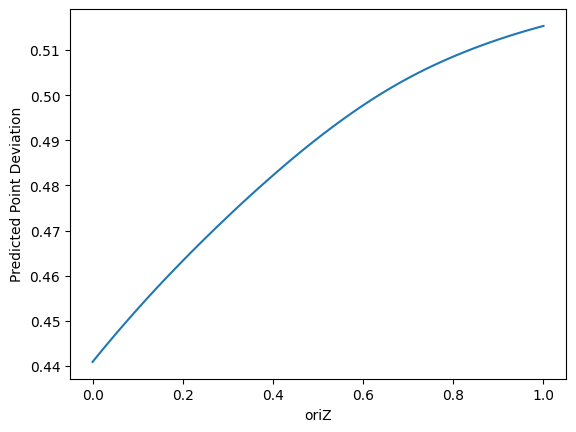

In [118]:
plt.figure()
plt.plot(xs, ys)
plt.xlabel(feature_names[feat])
plt.ylabel('Predicted Point Deviation')
plt.show()

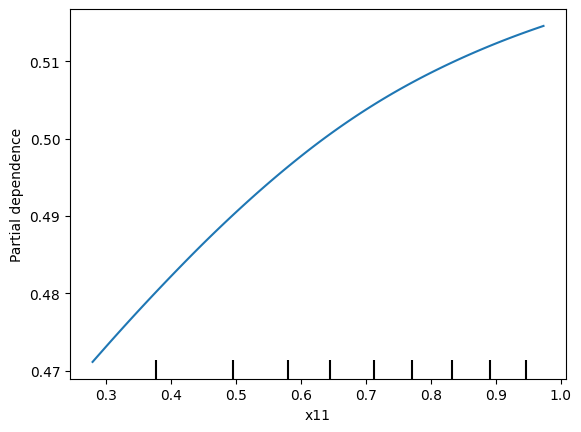

In [119]:
PartialDependenceDisplay.from_estimator(trained_model, X_train, [feat])

## Accumulated Local Effects

In [120]:
def ale(model, training_set, feature, num_bins):
    """
    Accumulated Local Effects

    """
    # step 1: get the min and max of the feature of interest
    feature_min = training_set[:, feature].min()
    feature_max = training_set[:, feature].max()

    # step 2: split the feature into num_bins bins
    bins = np.linspace(feature_min, feature_max, num_bins + 1)

    # for each bin, compute the bin effect
    bin_effect = []
    for i in range(num_bins):
        # create two clones of the original dataset
        training_set_1 = copy.deepcopy(training_set)
        training_set_2 = copy.deepcopy(training_set)

        # isolate points that belong to the bin
        mask = (training_set[:, feature] >= bins[i]) & (training_set[:, feature] < bins[i + 1])
        training_set_1 = training_set_1[mask]
        training_set_2 = training_set_2[mask]

        # set the feature of interest to the lower bound of the bin
        training_set_1[:, feature] = bins[i]

        # set the feature of interest to the upper bound of the bin
        training_set_2[:, feature] = bins[i + 1]

        # predict on the two modified datasets
        y_1 = model.predict(training_set_1)
        y_2 = model.predict(training_set_2)

        # compute the bin effect
        bin_effect.append((y_2 - y_1).mean())

    return bins, bin_effect

In [121]:
def plot_ale(bins, bin_effect):
    """
    Plot the accumulated local effects

    """
    # step 1: compute the bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # step 2: plot the bin effect
    plt.figure()
    plt.bar(bin_centers, bin_effect, width=bins[1] - bins[0])
    plt.xlabel(feature_names[0])
    plt.ylabel('Bin Effect')
    plt.show()

    # step 3: plot the accumulated local effects
    plt.figure()
    plt.plot(bin_centers, np.cumsum(bin_effect))
    plt.xlabel(feature_names[0])
    plt.ylabel('Accumulated Local Effects')
    plt.show()

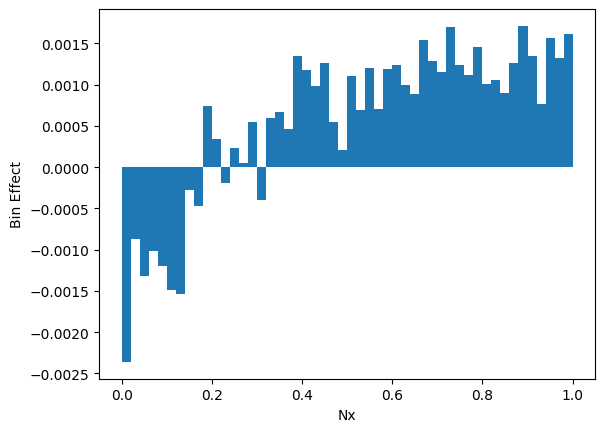

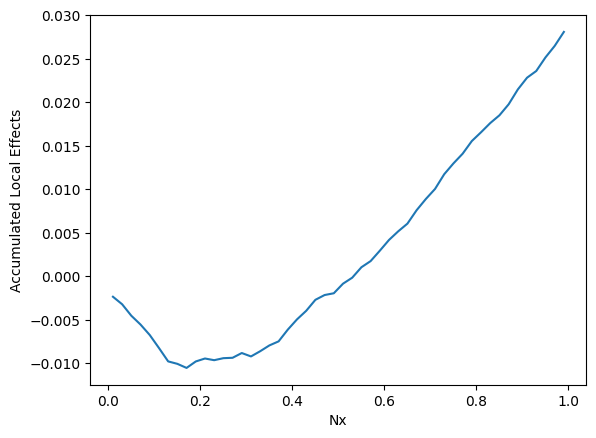

In [122]:
bins, bin_effect = ale(trained_model, X_train, feat, num_bins=50)
plot_ale(bins, bin_effect)

PyALE._ALE_generic:INFO: Continuous feature detected.


         Nx        Ny        Nz      Xnom      Ynom      Znom  LateralDensity  \
0  0.681193  0.231997  0.794502  0.605804  0.350950  0.361018             0.0   
1  0.114746  0.589447  0.559254  0.113372  0.598425  0.654156             0.5   
2  0.299658  0.551264  0.888898  0.365658  0.536387  0.545178             0.5   
3  0.786221  0.489196  0.781768  0.706047  0.489491  0.487443             0.5   
4  0.320484  0.783197  0.656339  0.388494  0.701404  0.410436             0.5   

   DirectionDensity  ExposureTime      oriX      oriY      oriZ       Inc  \
0             1.000           1.0  0.681193  0.231997  0.794502  0.793522   
1             0.000           0.0  0.114747  0.589447  0.559255  0.558852   
2             0.375           0.0  0.299658  0.551263  0.888898  0.888962   
3             1.000           0.5  0.786221  0.489196  0.781769  0.781569   
4             0.000           0.5  0.320484  0.783197  0.656338  0.656726   

        ang   ViewAng        Rs  AcmosJ  oriYcmos 

C:\Users\vasil\github\tutorials\xmanai-grapes-lab\env\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
C:\Users\vasil\github\tutorials\xmanai-grapes-lab\env\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


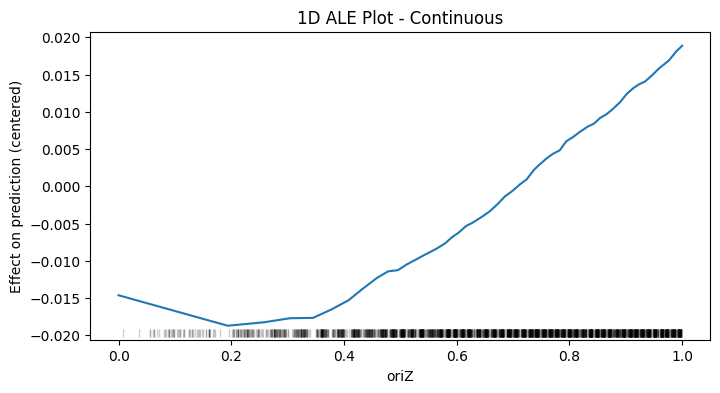

In [123]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)
feature_name = feature_names[feat]
_ = PyALE.ale(X=X_train_df, model=trained_model, feature=[feature_name], grid_size=50, include_CI=False)

0.034767778176490585